In [1]:
import pandas as pd
import sklearn.preprocessing as sp

In [2]:
data = pd.read_csv('car.txt', header=None)
#data.columns = ['header1', 'header2', 'header3', 'header4', 'header5', 'header6', 'header7']

In [3]:
data

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
encoders = {}
for i in data:
    labelencoder = sp.LabelEncoder()
    data[i] = labelencoder.fit_transform(data[i])
    encoders[i] = labelencoder

In [5]:
data

,0,1,2,3,4,5,6
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [6]:
train_data = data

In [7]:
train_data

,0,1,2,3,4,5,6
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [8]:
#整理输入输出

In [9]:
x = train_data.iloc[:, :-1]
y = train_data.iloc[:, -1]
print(x)
print(y)

      0  1  2  3  4  5
0     3  3  0  0  2  1
1     3  3  0  0  2  2
2     3  3  0  0  2  0
3     3  3  0  0  1  1
4     3  3  0  0  1  2
...  .. .. .. .. .. ..
1723  1  1  3  2  1  2
1724  1  1  3  2  1  0
1725  1  1  3  2  0  1
1726  1  1  3  2  0  2
1727  1  1  3  2  0  0

[1728 rows x 6 columns]
0       2
1       2
2       2
3       2
4       2
       ..
1723    1
1724    3
1725    2
1726    1
1727    3
Name: 6, Length: 1728, dtype: int64


In [10]:
import sklearn.tree as st
import sklearn.ensemble as se
import numpy as np

In [11]:
model = se.RandomForestClassifier(max_depth=6, n_estimators=400, random_state=7)

In [12]:
# 用已知输入、输出数据集训练回归器
model.fit(x, y)

RandomForestClassifier(max_depth=6, n_estimators=400, random_state=7)

In [13]:
test_data = [
    ['high', 'med', '5more', '4', 'big', 'low', 'unacc'],
    ['high', 'high', '4', '4', 'med', 'med', 'acc'],
    ['low', 'low', '2', '4', 'small', 'high', 'good'],
    ['low', 'med', '3', '4', 'med', 'high', 'vgood'],
]

In [14]:
#test_data=np.array(test_data)

In [15]:
test_data = pd.DataFrame(test_data)

In [16]:
test_data

,0,1,2,3,4,5,6
0,high,med,5more,4,big,low,unacc
1,high,high,4,4,med,med,acc
2,low,low,2,4,small,high,good
3,low,med,3,4,med,high,vgood


In [17]:
for i in test_data:
    labelencoder = encoders[i]
    res = labelencoder.transform(test_data[i])
    test_data[i] = res

In [18]:
test_data

,0,1,2,3,4,5,6
0,0,2,3,1,0,1,2
1,0,0,2,1,1,2,0
2,1,1,0,1,2,0,1
3,1,2,1,1,1,0,3


In [19]:
test_x = test_data.iloc[:, :-1]
test_y = test_data.iloc[:, -1]

In [20]:
# 根据训练模型预测输出
pred_y = model.predict(test_x)

In [21]:
pred_y

array([2, 0, 0, 0])

In [22]:
test_y

0    2
1    0
2    1
3    3
Name: 6, dtype: int64

In [23]:
encoders[6].inverse_transform(pred_y)

array(['unacc', 'acc', 'acc', 'acc'], dtype=object)

In [24]:
import sklearn.metrics as sm

In [25]:
print(sm.classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         1

    accuracy                           0.50         4
   macro avg       0.33      0.50      0.38         4
weighted avg       0.33      0.50      0.38         4



/Users/limuyuan/Documents/Artificial-Intelligence-Note/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/limuyuan/Documents/Artificial-Intelligence-Note/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/limuyuan/Documents/Artificial-Intelligence-Note/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

In [26]:
############################################老师代码#################################################

In [27]:
'''
小汽车等级预测
'''
import pandas as pd
import sklearn.preprocessing as sp  #数据预处理
import sklearn.ensemble as se  #集成学习

In [28]:
data = pd.read_csv('car.txt',
                   header=None)

#数据预处理（标签编码）
train_data = pd.DataFrame()  #用于保存处理结果
encoders = {}  #存储标签编码器的容器
for i in data:
    encoder = sp.LabelEncoder()
    res = encoder.fit_transform(data[i])
    train_data[i] = res
    encoders[i] = encoder
test_data

,0,1,2,3,4,5,6
0,0,2,3,1,0,1,2
1,0,0,2,1,1,2,0
2,1,1,0,1,2,0,1
3,1,2,1,1,1,0,3


In [29]:
import sklearn.model_selection as ms
import matplotlib.pyplot as plt

In [30]:
#整理输入和输出（使用全部样本进行训练）
x = train_data.iloc[:, :-1]
y = train_data.iloc[:, -1]

#构建模型（随机森林）
model = se.RandomForestClassifier(max_depth=6,
                                  n_estimators=400,
                                  random_state=7)

In [31]:
#执行训练
model.fit(x, y)

RandomForestClassifier(max_depth=6, n_estimators=400, random_state=7)

In [32]:
test_data = [['high', 'med', '5more', '4', 'big', 'low', 'unacc'],
             ['high', 'high', '4', '4', 'med', 'med', 'acc'],
             ['low', 'low', '2', '4', 'small', 'high', 'good'],
             ['low', 'med', '3', '4', 'med', 'high', 'vgood']]

#测试数据和训练数据要保持一致
test_data = pd.DataFrame(test_data)
for i in test_data:
    encoder = encoders[i]  #拿到训练集对应的列的编码器
    res = encoder.transform(test_data[i])
    test_data[i] = res
print(test_data)

   0  1  2  3  4  5  6
0  0  2  3  1  0  1  2
1  0  0  2  1  1  2  0
2  1  1  0  1  2  0  1
3  1  2  1  1  1  0  3


In [33]:
test_x = test_data.iloc[:, :-1]
test_y = test_data.iloc[:, -1]
#预测评估（准确率）
pred_test_y = model.predict(test_x)

print('真实值:', encoders[6].inverse_transform(test_y.values))
print('预测值:', encoders[6].inverse_transform(pred_test_y))

真实值: ['unacc' 'acc' 'good' 'vgood']
预测值: ['unacc' 'acc' 'acc' 'acc']


In [34]:
print(sm.classification_report(test_y, pred_test_y))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         1

    accuracy                           0.50         4
   macro avg       0.33      0.50      0.38         4
weighted avg       0.33      0.50      0.38         4



/Users/limuyuan/Documents/Artificial-Intelligence-Note/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/limuyuan/Documents/Artificial-Intelligence-Note/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/limuyuan/Documents/Artificial-Intelligence-Note/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

In [35]:
#########模型优化

In [36]:
#验证曲线
import sklearn.model_selection as ms
import numpy as np
import matplotlib.pyplot as plt

In [37]:
params = np.arange(2, 7)

In [38]:
data = pd.read_csv('car.txt',
                   header=None)

#数据预处理（标签编码）
train_data = pd.DataFrame()  #用于保存处理结果
encoders = {}  #存储标签编码器的容器
for i in data:
    encoder = sp.LabelEncoder()
    res = encoder.fit_transform(data[i])
    train_data[i] = res
    encoders[i] = encoder
test_data
#整理输入和输出（使用全部样本进行训练）
x = train_data.iloc[:, :-1]

y = train_data.iloc[:, -1]

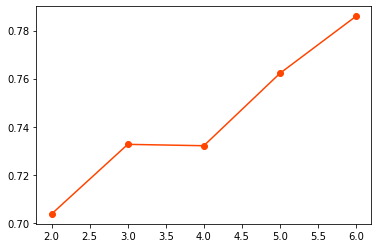

In [39]:
#构建模型（随机森林）
model = se.RandomForestClassifier(max_depth=6,
                                  n_estimators=400,
                                  random_state=7)
params = np.arange(2, 7)
#模型创建后，开始训练前使用验证曲线
# 通过不同参数，构建多棵决策树，验证其准确性
train_scores, test_scores = ms.validation_curve(model,  # 模型
                                                x, y,
                                                param_name='max_depth',  # 模型参数名称
                                                param_range=params,  # 模型参数值
                                                cv=5)  #用交叉验证的方式
ave_score = test_scores.mean(axis=1)
plt.plot(params, ave_score, 'o-', color='orangered')

In [40]:
#学习曲线

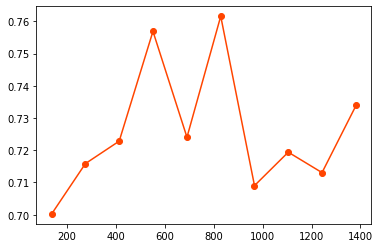

In [41]:
model = se.RandomForestClassifier(max_depth=6,
                                  n_estimators=150,
                                  random_state=7,
                                  class_weight='balanced')
train_sizes = np.linspace(0.1, 1, 10)
train_sizes, train_scores, test_scores = ms.learning_curve(
    model,
    x, y,
    train_sizes=train_sizes,
    cv=5)  #交叉验证折叠数量
ave_score = test_scores.mean(axis=1)
plt.plot(train_sizes, ave_score, 'o-', color='orangered')

In [42]:
print(len(data))

1728


In [43]:
#数据不均衡，肯定是训练出来差模型，

In [44]:
#让数据均衡的方法：
#     上采样：
#     下采样：以最少的数据为准，开始删多的数据
#     样本不够，权重来凑

In [45]:
print(model.predict_proba(pred_y))  #这样可以打印置信度

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
#==========================================支持向量机===================================================

In [ ]:
#线性和函数

In [ ]:
import pandas as pd

In [46]:
import pandas as pd

data = pd.read_csv('multiple2.txt', header=None, names=['x1', 'x2', 'y'])
data.head()

,x1,x2,y
0,5.35,4.48,0
1,6.72,5.37,0
2,3.57,5.25,0
3,4.77,7.65,1
4,2.25,4.07,1


In [1]:
import sklearn.svm as svm

In [ ]:
model = ms.RandomizedSearchCV(svm.SVC(), cv=5)  # 创建网格搜索对象
model.fit(x, y)  # 训练